In [42]:
# Installing libraries libraries 
#!pip install pystan
#!pip install fbprophet

In [7]:
# Importing libraries
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd
from fbprophet import Prophet

In [5]:
#Loading data
df = pd.read_csv('out_evap.csv')
df.head()

,time,step,number,surface,latitude,longitude,valid_time,e
0,2020-08-01,0 days 06:00:00,0,0.0,-15.8,46.4,2020-08-01 06:00:00,-0.000345
1,2020-08-01,0 days 12:00:00,0,0.0,-15.8,46.4,2020-08-01 12:00:00,-0.001602
2,2020-08-01,0 days 18:00:00,0,0.0,-15.8,46.4,2020-08-01 18:00:00,-0.002006
3,2020-08-01,1 days 00:00:00,0,0.0,-15.8,46.4,2020-08-02 00:00:00,-0.002442
4,2020-08-02,0 days 06:00:00,0,0.0,-15.8,46.4,2020-08-02 06:00:00,-0.000624


In [6]:
df.tail()

,time,step,number,surface,latitude,longitude,valid_time,e
2547,2022-04-29,1 days 00:00:00,0,0.0,-15.8,46.4,2022-04-30 00:00:00,-0.005201
2548,2022-04-30,0 days 06:00:00,0,0.0,-15.8,46.4,2022-04-30 06:00:00,-0.000681
2549,2022-04-30,0 days 12:00:00,0,0.0,-15.8,46.4,2022-04-30 12:00:00,-0.003412
2550,2022-04-30,0 days 18:00:00,0,0.0,-15.8,46.4,2022-04-30 18:00:00,-0.004131
2551,2022-04-30,1 days 00:00:00,0,0.0,-15.8,46.4,2022-05-01 00:00:00,-0.004504


In [8]:
df.describe()

,number,surface,latitude,longitude,e
count,2552.0,2552.0,2552.0,2.552000e+03,2552.000000
mean,0.0,0.0,-15.8,4.640000e+01,-0.002655
std,0.0,0.0,0.0,7.106820e-15,0.001577
min,0.0,0.0,-15.8,4.640000e+01,-0.007316
25%,0.0,0.0,-15.8,4.640000e+01,-0.003885
50%,0.0,0.0,-15.8,4.640000e+01,-0.002505
75%,0.0,0.0,-15.8,4.640000e+01,-0.001258
max,0.0,0.0,-15.8,4.640000e+01,-0.000125


In [9]:
print(df['e'].unique())

[-0.00034531 -0.00160186 -0.00200597 ... -0.00341242 -0.00413073
 -0.0045039 ]


In [10]:
df.dtypes

time           object
step           object
number          int64
surface       float64
latitude      float64
longitude     float64
valid_time     object
e             float64
dtype: object

In [12]:
df['time'] = pd.to_datetime(df['time'])

In [13]:
df.dtypes

time          datetime64[ns]
step                  object
number                 int64
surface              float64
latitude             float64
longitude            float64
valid_time            object
e                    float64
dtype: object

In [17]:
df.drop(['step', 'number', 'surface', 'latitude', 'longitude', 'valid_time'], axis=1, inplace=True)
df.columns = ['ds','y']

In [23]:
df.head()

,ds,y
0,2020-08-01,-0.000345
1,2020-08-01,-0.001602
2,2020-08-01,-0.002006
3,2020-08-01,-0.002442
4,2020-08-02,-0.000624


In [20]:
model = Prophet()

In [24]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [27]:
future_dates = model.make_future_dataframe(periods=365)

In [28]:
future_dates.tail()

,ds
998,2023-04-26
999,2023-04-27
1000,2023-04-28
1001,2023-04-29
1002,2023-04-30


In [29]:
pred = model.predict(future_dates)

In [30]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-01,-0.001406,-0.003403,0.000473,-0.001406,-0.001406,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.0,0.0,0.0,-0.001362
1,2020-08-02,-0.001418,-0.003121,0.000464,-0.001418,-0.001418,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,0.0,0.0,0.0,-0.001432
2,2020-08-03,-0.001430,-0.003348,0.000327,-0.001430,-0.001430,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,0.0,0.0,0.0,-0.001462
3,2020-08-04,-0.001442,-0.003144,0.000456,-0.001442,-0.001442,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.0,0.0,0.0,-0.001419
4,2020-08-05,-0.001454,-0.003341,0.000169,-0.001454,-0.001454,-0.000050,-0.000050,-0.000050,-0.000050,-0.000050,-0.000050,0.0,0.0,0.0,-0.001504


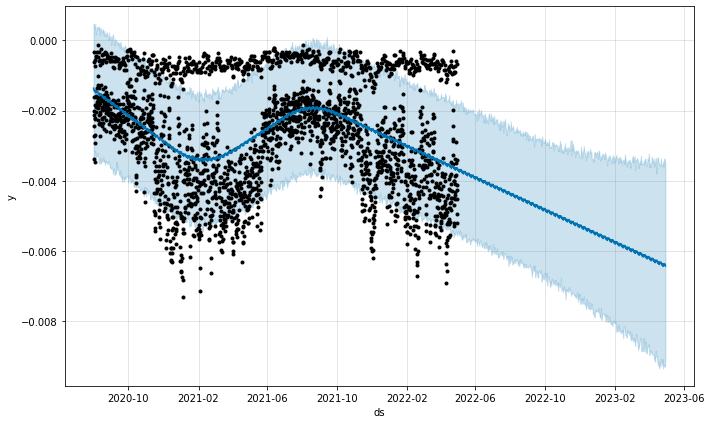

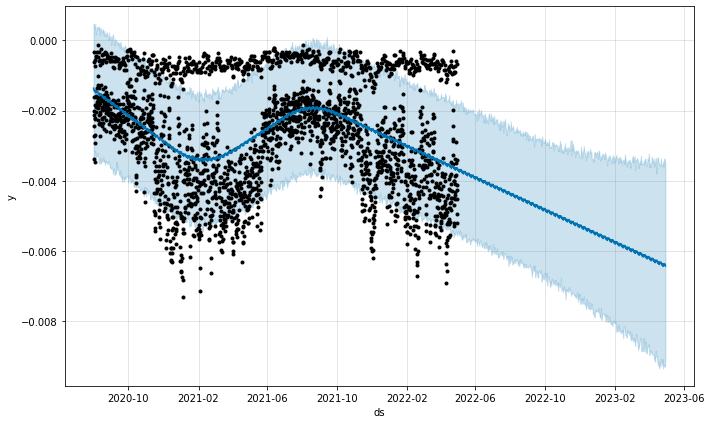

In [31]:
model.plot(pred)

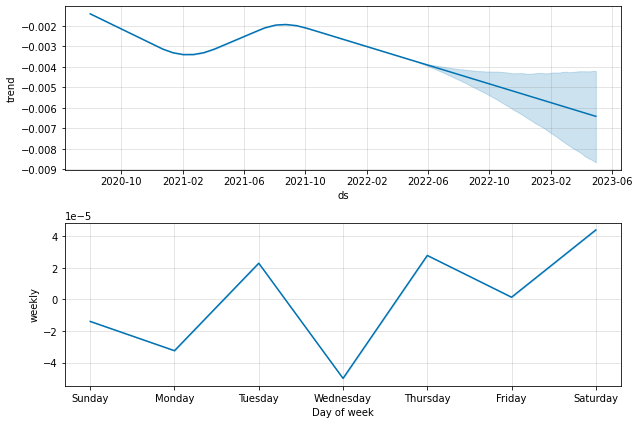

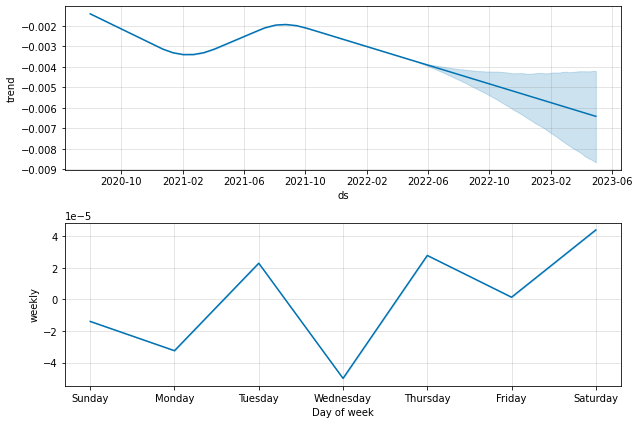

In [32]:
model.plot_components(pred)

In [39]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='120 days', period= '180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-04-30 00:00:00 and 2021-04-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-05-01,-0.003619,-0.005592,-0.001601,-0.000711,2021-04-30
1,2021-05-01,-0.003619,-0.005357,-0.001841,-0.003813,2021-04-30
2,2021-05-01,-0.003619,-0.005707,-0.001803,-0.004405,2021-04-30
3,2021-05-01,-0.003619,-0.005479,-0.001695,-0.004527,2021-04-30
4,2021-05-02,-0.003732,-0.005678,-0.001771,-0.000568,2021-04-30


In [40]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.000003,0.001818,0.001425,1.755543,0.353102,0.736301
1,38 days,0.000003,0.001819,0.001427,1.750370,0.368343,0.736301
2,39 days,0.000003,0.001820,0.001429,1.738902,0.392187,0.736301
3,40 days,0.000003,0.001823,0.001437,1.726298,0.395727,0.736301
4,41 days,0.000003,0.001826,0.001448,1.716486,0.395727,0.736301


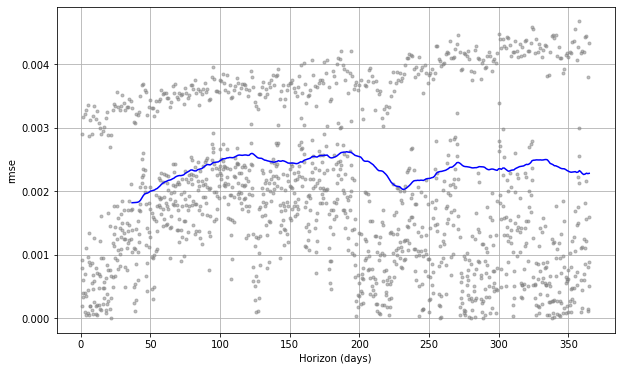

In [41]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')